In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib as plt
from matplotlib import pyplot

In [2]:
data = pd.read_csv("../outputs/clean_houses.csv")

In [3]:
data.rename(columns={"Unnamed: 0":"index"},inplace=True)
data.head()

,index,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [4]:
# Para realizar nuestra predicción necesitamos que todos nuestros datos sean numéricos.
# Vamos a comprobar por tanto que tipos de datos tenemos.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17398 entries, 0 to 17397
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               17398 non-null  int64  
 1   neighborhood_id     17398 non-null  object 
 2   house_type_id       17398 non-null  object 
 3   is_renewal_needed   17398 non-null  bool   
 4   is_new_development  17398 non-null  bool   
 5   sq_mt_built         17398 non-null  float64
 6   n_rooms             17398 non-null  int64  
 7   n_bathrooms         17398 non-null  float64
 8   floor               17398 non-null  object 
 9   is_exterior         17398 non-null  bool   
 10  has_lift            17398 non-null  bool   
 11  has_parking         17398 non-null  bool   
 12  has_storage_room    17398 non-null  bool   
 13  has_terrace         17398 non-null  bool   
 14  has_balcony         17398 non-null  bool   
 15  has_pool            17398 non-null  bool   
 16  buy_

In [5]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [6]:
# Transformamos ahora todas las columnas type object y bool a float64, excepto floor.

transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

0        0
1        0
2        0
3        0
4        1
        ..
17393    1
17394    1
17395    0
17396    1
17397    1
Name: has_pool, Length: 17398, dtype: int64

In [7]:
# Aplicamos ahora get_dummies a la columna floor.

data = pd.get_dummies(data, columns = ["floor"])

In [8]:
data.columns

Index(['index', 'neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude', 'floor_1', 'floor_2',
       'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
       'floor_9', 'floor_Bajo', 'floor_Entreplanta exterior',
       'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
       'floor_Semi-sótano interior', 'floor_Sótano exterior',
       'floor_Sótano interior'],
      dtype='object')

In [9]:
# Vamos a ordenar ahora las columnas y nos deshacemos de la columna neighborhood.

data = data[['index', 'house_type_id', 'is_renewal_needed',
        'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
        'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
        'has_terrace', 'has_balcony', 'has_pool',
        'latitude', 'longitude', 'floor_1', 'floor_2',
        'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
        'floor_9', 'floor_Bajo', 'floor_Entreplanta exterior',
        'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
        'floor_Semi-sótano interior', 'floor_Sótano exterior',
        'floor_Sótano interior', 'buy_price']]

In [10]:
data.set_index("index", inplace=True)
data.head()

,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,is_exterior,has_lift,has_parking,has_storage_room,...,floor_8,floor_9,floor_Bajo,floor_Entreplanta exterior,floor_Entreplanta interior,floor_Semi-sótano exterior,floor_Semi-sótano interior,floor_Sótano exterior,floor_Sótano interior,buy_price
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,64.0,2,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,85000
1,0,1,0,70.0,3,1.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,129900
2,0,0,0,94.0,2,2.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,144247
3,0,0,0,64.0,2,1.0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,109900
4,0,0,0,108.0,2,2.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,260000


### Una vez tenemos todos los datos correctamente organizados, vamos a proceder a entrenar los datos.
### En este caso nuestro GroundTruth es buy price, por lo que vamos a proceder a realizar el estudio.

In [11]:
columnas = [col for col in data.columns if col not in ["buy_price"]]
X = data[columnas]
y = data["buy_price"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Vamos a descubrir cual es el modelo que mejor funciona

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [14]:
models = {
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [15]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado 


-------DecisionTree-------
EVS 0.842
ME 4750000.0
MAE 91765.981
RMSE 232381.32
R2 0.842
-------RandomForest-------
EVS 0.916
ME 3560490.0
MAE 71040.149
RMSE 169327.985
R2 0.916
-------ExtraTrees-------
EVS 0.907
ME 3652672.0
MAE 74884.068
RMSE 178385.91
R2 0.907
-------GradientBoosting-------
EVS 0.891
ME 3461441.829
MAE 98437.625
RMSE 192770.557
R2 0.891
-------HistGradientBoosting-------
EVS 0.904
ME 3256451.11
MAE 84152.995
RMSE 180762.29
R2 0.904
-------Voting-------
EVS 0.918
ME 3667806.0
MAE 70079.549
RMSE 167679.255
R2 0.918


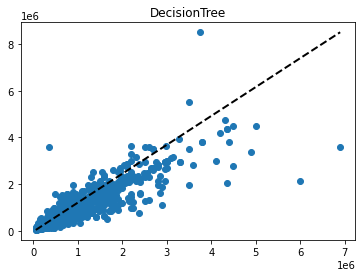

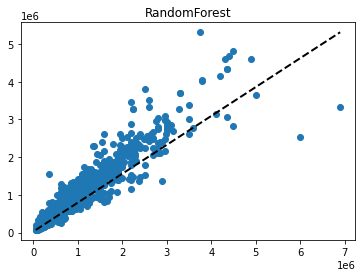

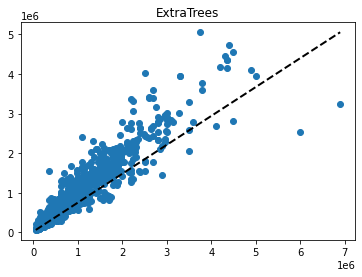

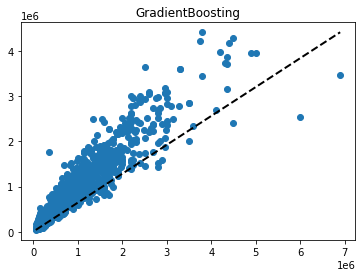

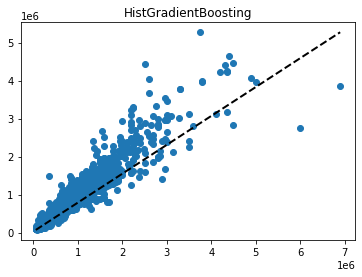

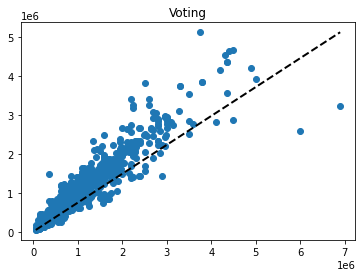

In [16]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("EVS", round(explained_variance_score(y_test,y_pred),3))
    print("ME", round(max_error(y_test,y_pred),3))
    print("MAE", round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.pyplot.figure()
    plt.pyplot.title(name)
    plt.pyplot.scatter(y_test,y_pred)
    plt.pyplot.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [17]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.7107520308671967
RandomForest accuracy0.8291739481830817
ExtraTrees accuracy0.7976551424015325
GradientBoosting accuracy0.7111767220520646
HistGradientBoosting accuracy0.8370119638979316
Voting accuracy0.8289652687209894


## ------------------------------  Prueba con otras features.  ------------------------------------------

In [18]:
columnas = [col for col in data.columns if col not in ["has_pool","has_terrace","has_balcony","buy_price"]]
X = data[columnas]
y = data["buy_price"]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
models = {
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [21]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado 


-------DecisionTree-------
EVS 0.832
ME 4750000.0
MAE 92292.539
RMSE 239257.398
R2 0.832
-------RandomForest-------
EVS 0.916
ME 3666200.0
MAE 71583.194
RMSE 169359.696
R2 0.916
-------ExtraTrees-------
EVS 0.91
ME 3713270.0
MAE 73293.903
RMSE 175527.582
R2 0.91
-------GradientBoosting-------
EVS 0.891
ME 3470854.496
MAE 98936.867
RMSE 192641.534
R2 0.891
-------HistGradientBoosting-------
EVS 0.904
ME 3222639.352
MAE 85282.427
RMSE 181332.585
R2 0.904
-------Voting-------
EVS 0.916
ME 3718851.0
MAE 70509.403
RMSE 169124.593
R2 0.916


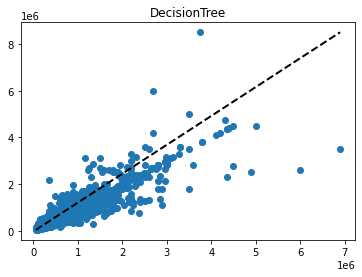

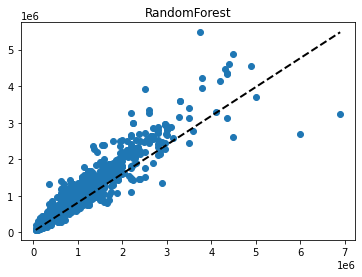

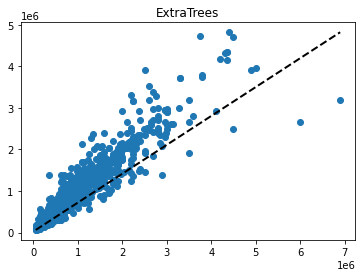

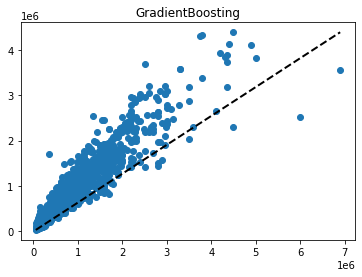

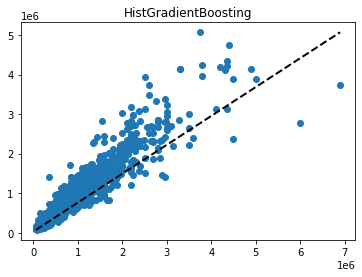

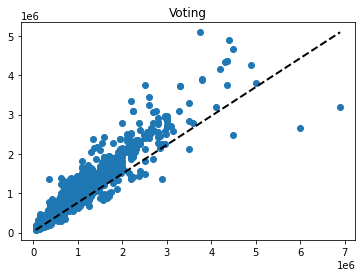

In [22]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("EVS", round(explained_variance_score(y_test,y_pred),3))
    print("ME", round(max_error(y_test,y_pred),3))
    print("MAE", round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.pyplot.figure()
    plt.pyplot.title(name)
    plt.pyplot.scatter(y_test,y_pred)
    plt.pyplot.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [23]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.6618943403439833
RandomForest accuracy0.825759397550007
ExtraTrees accuracy0.8222953316155758
GradientBoosting accuracy0.720604955778738
HistGradientBoosting accuracy0.8327049748644848
Voting accuracy0.836833666500924


## Pruebas eliminando viviendas con precios por encima de 1.200.000€

In [115]:
data1 = pd.read_csv("../outputs/clean_houses.csv")

In [116]:
data1.rename(columns={"Unnamed: 0":"index"},inplace=True)
data1.set_index("index", inplace=True)
data1.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
index,,,,,,,,,,,,,,,,,,,
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [117]:
data1[data1.buy_price>2000000].count()

neighborhood_id       645
house_type_id         645
is_renewal_needed     645
is_new_development    645
sq_mt_built           645
n_rooms               645
n_bathrooms           645
floor                 645
is_exterior           645
has_lift              645
has_parking           645
has_storage_room      645
has_terrace           645
has_balcony           645
has_pool              645
buy_price             645
buy_price_by_area     645
latitude              645
longitude             645
dtype: int64

In [118]:
data1 = data1.drop(data1[data1["buy_price"]>1200000].index)

In [119]:
data1

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
index,,,,,,,,,,,,,,,,,,,
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17393,"Campo de las Naciones-Corralejos, Barajas(Madrid)",HouseType 1: Pisos,False,False,88.0,2,2.0,1,True,True,True,True,False,False,True,360000,4420,40.459749,-3.612738
17394,"Campo de las Naciones-Corralejos, Barajas(Madrid)",HouseType 1: Pisos,False,False,99.0,2,2.0,1,True,True,True,True,False,False,True,349000,3525,40.459749,-3.612738
17395,"Casco Histórico de Barajas, Barajas(Madrid)",HouseType 5: Áticos,False,False,78.0,2,2.0,4,True,True,True,True,False,False,False,350000,4487,40.479840,-3.580251


In [120]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data1[column] = le.fit_transform(data1[column])
    return data1[column]

In [121]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

index
0        0
1        0
2        0
3        0
4        1
        ..
17393    1
17394    1
17395    0
17396    1
17397    1
Name: has_pool, Length: 15624, dtype: int64

In [122]:
# Aplicamos ahora get_dummies a la columna floor.

data1 = pd.get_dummies(data1, columns = ["floor"])

In [123]:
data1.columns

Index(['neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude', 'floor_1', 'floor_2',
       'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
       'floor_9', 'floor_Bajo', 'floor_Entreplanta exterior',
       'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
       'floor_Semi-sótano interior', 'floor_Sótano exterior',
       'floor_Sótano interior'],
      dtype='object')

In [125]:
data1 = data1[['latitude', 'longitude', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool',
       'buy_price_by_area', 'floor_1', 'floor_2',
       'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
       'floor_9', 'floor_Bajo', 'floor_Entreplanta exterior',
       'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
       'floor_Semi-sótano interior', 'floor_Sótano exterior',
       'floor_Sótano interior', 'buy_price']]

In [126]:
columnas = [col for col in data1.columns if col not in ["buy_price"]]
X = data1[columnas]
y = data1["buy_price"]

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [128]:
models = {
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [129]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado 


-------DecisionTree-------
EVS 0.998
ME 125000.0
MAE 5280.002
RMSE 11183.503
R2 0.998
-------RandomForest-------
EVS 1.0
ME 132981.0
MAE 2436.204
RMSE 5799.825
R2 1.0
-------ExtraTrees-------
EVS 0.999
ME 107358.89
MAE 3170.66
RMSE 7602.954
R2 0.999
-------GradientBoosting-------
EVS 0.997
ME 95665.49
MAE 10062.466
RMSE 14603.351
R2 0.997
-------HistGradientBoosting-------
EVS 0.998
ME 181165.803
MAE 5927.272
RMSE 10680.134
R2 0.998
-------Voting-------
EVS 0.999
ME 105025.5
MAE 2440.773
RMSE 5944.757
R2 0.999


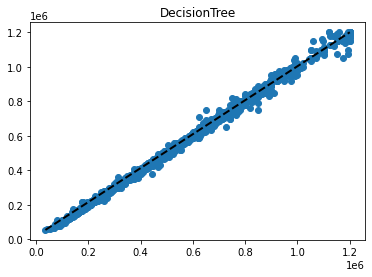

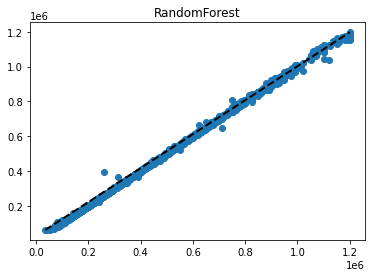

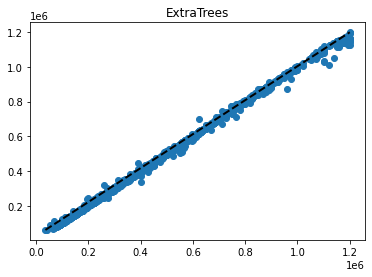

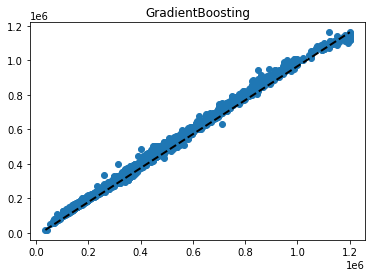

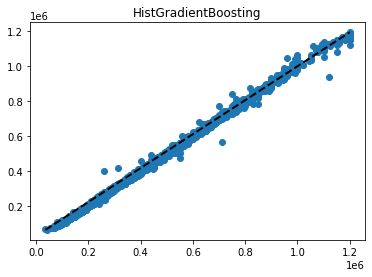

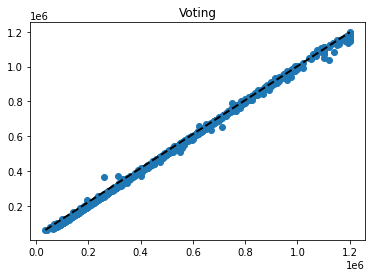

In [130]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("EVS", round(explained_variance_score(y_test,y_pred),3))
    print("ME", round(max_error(y_test,y_pred),3))
    print("MAE", round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.pyplot.figure()
    plt.pyplot.title(name)
    plt.pyplot.scatter(y_test,y_pred)
    plt.pyplot.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [ ]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.9959693063769534
RandomForest accuracy0.9985313233151608
ExtraTrees accuracy0.9959115563364831
GradientBoosting accuracy0.9945560051129819
HistGradientBoosting accuracy0.9969396782767065
